Convergence reached: IBSE - IAE = 8.572738009471337e-07, w = 0.8364020000032139, IAE = 0.1301196428943709, IBSE = 0.13012050016817184
Convergence reached: IBSE - IAE = -2.652854796392212e-07, w = 0.8364030000032139, IAE = 0.13011996426191366, IBSE = 0.13011969897643402


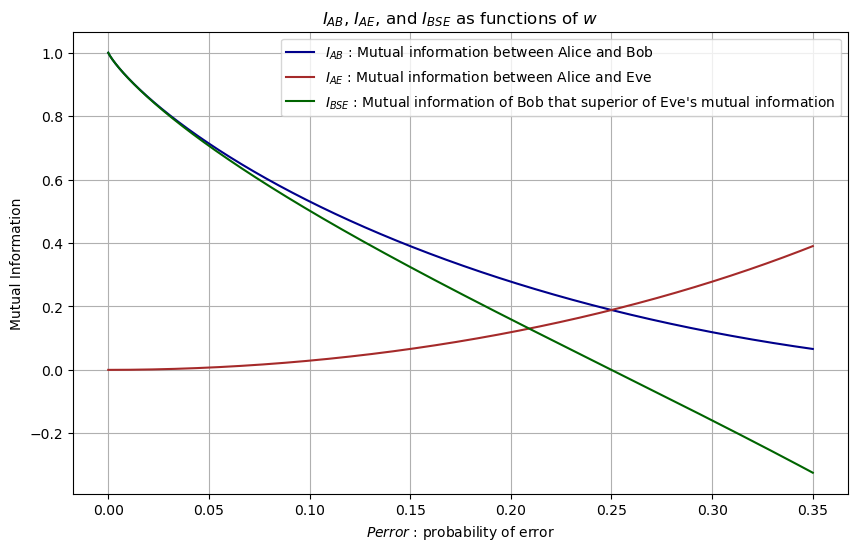

In [1]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 1e-6
w_step = 1e-6
w = 5e-5
w_values,IAE_values,IAB_values,IBSE_values,Perror_values = [],[],[],[],[]

while w <= 1.4:
    IAE = 0.5 * np.log2(1 - 0.25 * (w**2)) + (0.25 * w) * (np.log2((1 + 0.5 * w) / (1 - 0.5 * w)))
    IAB = np.log2(2 - 0.5 * w) - (0.25 * w) * (np.log2((4 / w) - 1))
    IBSE = IAB - IAE
    w_values.append(w)
    Perror_values.append(0.25*w)
    IAE_values.append(IAE)
    IAB_values.append(IAB)
    IBSE_values.append(IBSE)
    if np.fabs(IBSE - IAE) < epsilon:
        print(f"Convergence reached: IBSE - IAE = {IBSE - IAE}, w = {w}, IAE = {IAE}, IBSE = {IBSE}")
    w += w_step
    
plt.figure(figsize=(10, 6))
plt.plot(Perror_values, IAB_values, label='$I_{AB}$ : Mutual information between Alice and Bob', color='darkblue')
plt.plot(Perror_values, IAE_values, label='$I_{AE}$ : Mutual information between Alice and Eve', color='brown')
plt.plot(Perror_values, IBSE_values, label="$I_{BSE}$ : Mutual information of Bob that superior of Eve's mutual information", color='darkgreen')
plt.xlabel('$Perror$ : probability of error ')
plt.ylabel('Mutual Information')
plt.title('$I_{AB}$, $I_{AE}$, and $I_{BSE}$ as functions of $w$')
plt.legend()
plt.grid(True)
plt.show()